In [1]:
import sys 
import math 
import lmfit as lm
import numpy as np 
import pandas as pd
from epiweeks import Week
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse 
from edo_model_yang_weekly import system_odes, solve_model
from parameters import dict_theta_m, dict_mu_m
from parameters import d, theta_m, mu_a, mu_m, gamma_m
from parameters import beta as beta_ 
from parameters import b as b_ 


### Olhando para os dados de sorotipo

In [2]:
df_sor = pd.read_csv('sorotipo_by_year.csv')

df_sor['DENV-1'] = df_sor['DENV-1']*100
df_sor['DENV-2'] = df_sor['DENV-2']*100
df_sor['DENV-4'] = df_sor['DENV-4']*100

df_sor

,ano,DENV-1,DENV-2,DENV-4
0,2010,96.000000,4.000000,0.000000
1,2011,84.615385,15.384615,0.000000
2,2012,92.307692,7.692308,0.000000
3,2013,80.000000,0.000000,20.000000
4,2014,100.000000,0.000000,0.000000
5,2015,91.111111,0.000000,8.888889
6,2016,99.052133,0.000000,0.947867
7,2017,0.000000,0.000000,0.000000
8,2018,83.333333,8.333333,8.333333
9,2019,46.254072,18.023887,35.722041


Selecionando os anos epidêmicos apenas:

In [3]:
df_sor = df_sor.loc[df_sor.ano.isin([2010, 2011, 2013, 2015, 2016, 2019, 2020])]
weight_counts = {
    "DENV-1": np.array(df_sor['DENV-1']),
    "DENV-2": np.array(df_sor['DENV-2']),
    "DENV-4": np.array(df_sor['DENV-4'])
}
width = 0.5

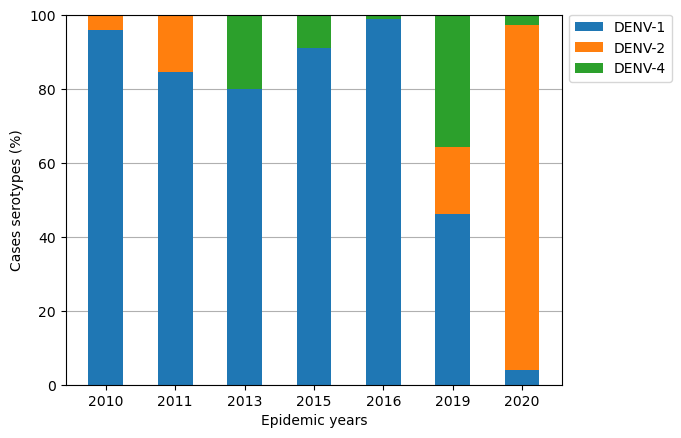

In [4]:
'''Plot só do sorotipo'''
fig, ax = plt.subplots()

bottom = np.zeros(len(df_sor.ano))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(df_sor.ano.astype(str), weight_count, width, label=boolean, bottom=bottom, zorder=2)
    bottom += weight_count
    
#ax.set_title('Sorotype notified by year (%)')
ax.set_ylabel('Cases serotypes (%)')
ax.set_xlabel('Epidemic years')


ax.legend(bbox_to_anchor=(1.001, 1.02), loc='upper left')

ax.set_xticks(df_sor.ano.astype(str), labels = df_sor.ano.astype(str))
ax.yaxis.grid(zorder= 1)

#plt.savefig('sorotype_only.png', dpi = 300, bbox_inches = 'tight')
plt.show()